<a href="https://colab.research.google.com/github/Itsdevanand/News_Topic_Prediction/blob/main/Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Data set is taken from kaggle

In [4]:
df = pd.read_csv("/content/BBC News Train.csv")
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [6]:
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

We can see that data is balanced.
Lets Clean the data

In [7]:
#Removing stopwords from data
stop = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [8]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens maj...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron bosses $168m payout eighteen former enro...,business


In [9]:
#Removing symbols from text
def cleaner(text):
  formated_text = re.sub('[^A-Za-z" "]+'," ", text).lower()
  formated_text = re.sub('[0-9" "]+', " ", formated_text)
  return formated_text

df['Text'] = df['Text'].apply(cleaner)

In [10]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens maj...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron bosses m payout eighteen former enron di...,business


In [11]:
#Lematization
df1 = df.copy()
lem = WordNetLemmatizer()

def lemm(text):
  words = word_tokenize(text)
  words1 = [lem.lemmatize(word) for word in words]  #lematization 
  text1 = ' '.join(words1)
  return text1

df['Text'] = df['Text'].apply(lemm)

In [12]:
#unigram word cloud 

text_sport = ' '.join(df[df['Category'] == 'sport']['Text'])
text_business = ' '.join(df[df['Category'] == 'business']['Text'])
text_politics = ' '.join(df[df['Category'] == 'politics']['Text'])
text_entertainment = ' '.join(df[df['Category'] == 'entertainment']['Text'])
text_tech = ' '.join(df[df['Category'] == 'tech']['Text'])


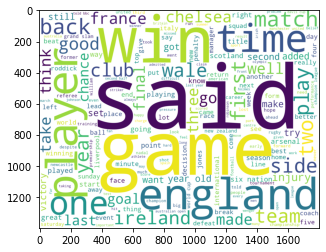

In [13]:
#World cloud on Sports news
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text_sport)

plt.imshow(wordcloud_ip)

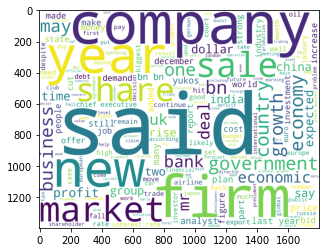

In [14]:
#World cloud on business news
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text_business)

plt.imshow(wordcloud_ip)

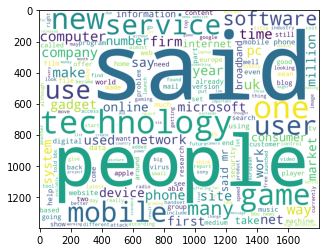

In [15]:
#World cloud on Tech news
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text_tech)

plt.imshow(wordcloud_ip)

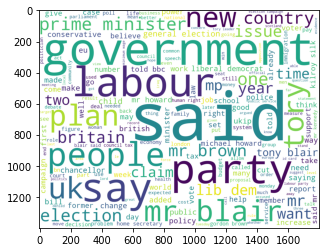

In [16]:
#World cloud on politics news
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text_politics)

plt.imshow(wordcloud_ip)

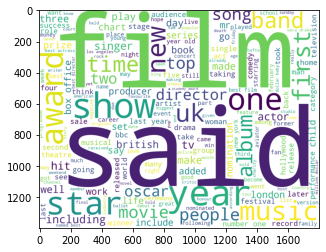

In [17]:
#World cloud on entertainment news
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text_entertainment)

plt.imshow(wordcloud_ip)

**Preparing Data For model building...**

In [18]:
#Label Encoding
from pandas.core.indexes import category
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['category'] = enc.fit_transform(df['Category'])


In [19]:
X = df['Text'].to_list() #input
Y = df['category'] #output


In [20]:
pip install sentence-transformers

     |████████████████████████████████| 78 kB 4.6 MB/s 
     |████████████████████████████████| 3.4 MB 27.4 MB/s 
     |████████████████████████████████| 6.8 MB 29.9 MB/s 
     |████████████████████████████████| 1.2 MB 45.1 MB/s 
     |████████████████████████████████| 61 kB 452 kB/s 
     |████████████████████████████████| 3.3 MB 42.0 MB/s 
     |████████████████████████████████| 895 kB 29.7 MB/s 
     |████████████████████████████████| 596 kB 39.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=30a502d15f689e3ee0f08c9bf8ad080b529767d78919e16f5173c6627a53b648
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [21]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [22]:
#generating sentence emebeding for each news text
sent_embed = []
for i in X:
  sent_embed.append(sbert_model.encode(i))
  


In [24]:
data = pd.DataFrame(sent_embed) #converting to data frame

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size = 0.3, random_state = 0, shuffle = True)

In [28]:
#implimenting grid search cv for random forest
from sklearn.model_selection import GridSearchCV
rf_clf_grid = RandomForestClassifier( n_jobs= -1, random_state=0)



param_grid = {'n_estimators': [100],"max_features": [ 10,100,200,400,500], "min_samples_split": [2, 3, 10]}

grid_search = GridSearchCV(rf_clf_grid, param_grid, n_jobs = -1, cv = 5, scoring = 'accuracy')

grid_search.fit(x_train, y_train)

grid_search.best_params_

cv_rf_clf_grid = grid_search.best_estimator_ ###

In [30]:
grid_search.best_params_

{'max_features': 10, 'min_samples_split': 10, 'n_estimators': 100}

In [29]:
#confusion_matrix(y_test, cv_rf_clf_grid.predict(x_test))
accuracy_score(y_test, cv_rf_clf_grid.predict(x_test))


0.9217002237136466

In [34]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
acc= []
for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    train_acc = np.mean(neigh.predict(x_train) == y_train)
    test_acc = np.mean(neigh.predict(x_test) == y_test)
    acc.append([train_acc, test_acc])


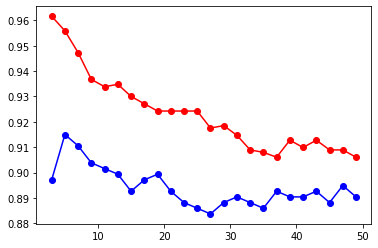

In [35]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")

In [36]:
#SVM with kernel linear
from sklearn.svm import SVC
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train, y_train)
pred_test_linear = model_linear.predict(x_test)

In [37]:
accuracy_score(y_test, pred_test_linear )

0.9440715883668904

In [44]:
accuracy_score(y_train, model_linear.predict(x_train) )

1.0